In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
#Getting the data
data = pd.read_csv('MNIST.csv')
data.insert(1, 'Ones', 1)
cols = data.shape[1]
X = np.matrix(data.iloc[:5000,1:cols])
Y = np.matrix(data.iloc[:5000,0:1])

ValueError: num must be 1 <= num <= 16, not 17

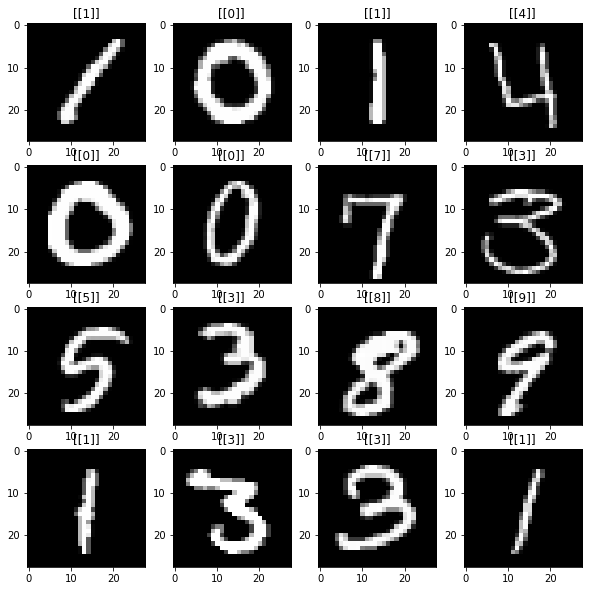

In [4]:
plt.figure(figsize = (10,10))
for i in range(16):
    for j in range(16):
        img = X[i+j,1:]
        img = img.reshape(28,-1)
        plt.subplot(4,4,i+j+1)
        plt.imshow(img, cmap = 'gray')
        plt.title(Y[i+j][0])
        

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    

In [6]:
def cost(X,Y,theta):
    hx = sigmoid(X*theta.T)
    sum1 = -Y.T.dot(np.log(hx))
    sum2 = (1-Y).T.dot( np.log(1 - hx))
    
    return float((sum1 - sum2))/X.shape[0]


In [7]:
def gradient(X,Y,theta,alpha,iters):
    for i in range(iters):
        temp = (sigmoid(hx) - Y)
        grad = X.T*temp
        theta = (np.subtract(theta.T,grad)*alpha/X.shape[0]).T
        
    return theta

In [8]:
def gradient_descent(X,y,theta,alpha,iters):
    for i in range(iters):
        theta = np.matrix(theta)
        X = np.matrix(X)
        y = np.matrix(y)
    
        parameters = int(theta.ravel().shape[1])
        grad = np.zeros(parameters)
    
        error = sigmoid(X * theta.T) - y
    
        for i in range(parameters):
            term = np.multiply(error, X[:,i])
            grad[i] = (np.sum(term)*alpha / len(X))
            
        theta -= np.matrix(grad)
    
        return theta

In [9]:
theta = np.matrix(np.zeros(785))
cost(X,Y,theta)

0.693147180559946

In [10]:
theta = gradient_descent(X,Y,theta,0.00001,10000)
cost(X,Y,theta)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


nan